In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

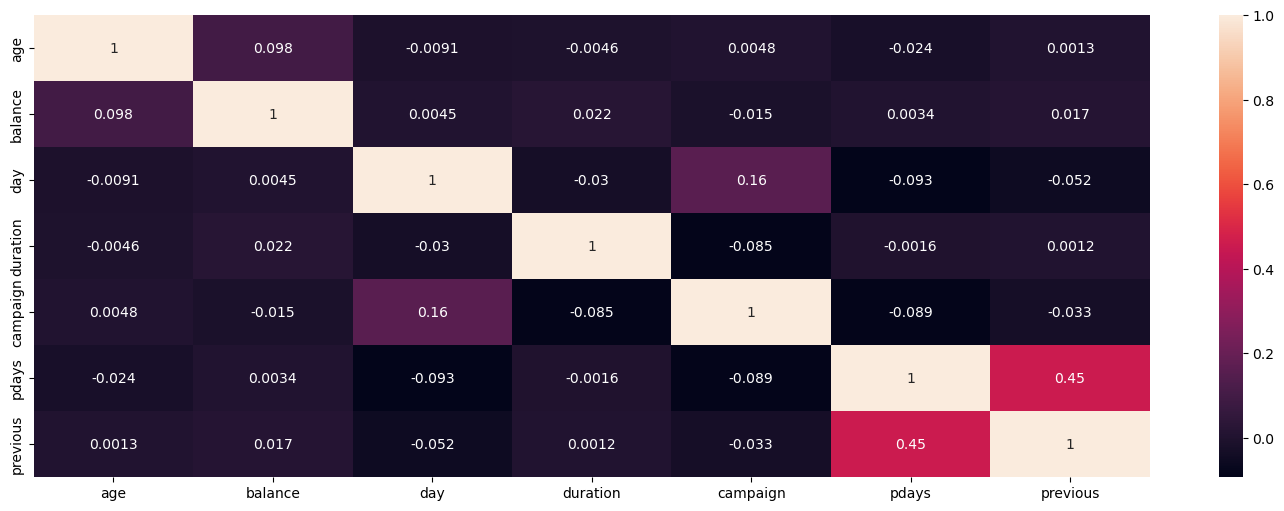

In [25]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);
plt.show()

# `Insights`
The scatter matrix does not reveal any clear relationship among age, balance, duration and campaign.

<Axes: xlabel='age'>

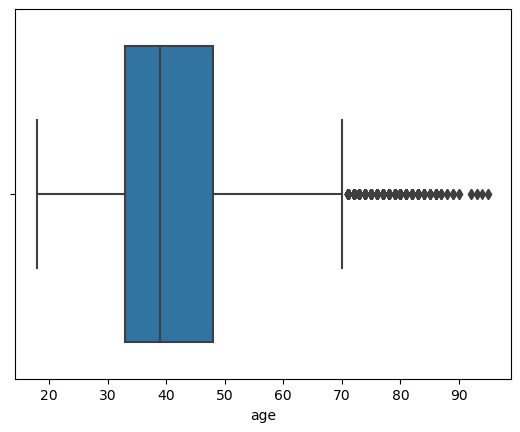

In [38]:
sns.boxplot(x='age',data=df)

<Axes: xlabel='balance'>

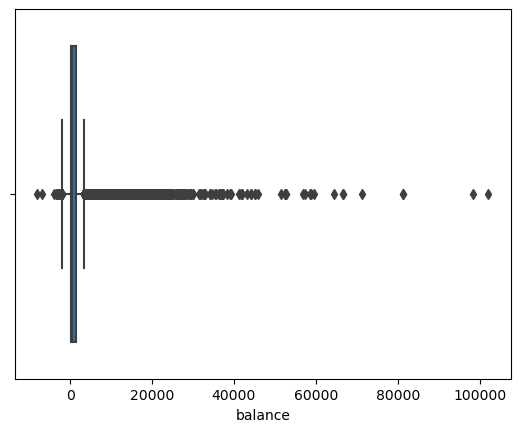

In [39]:
sns.boxplot(x='balance',data=df)

<Axes: xlabel='day'>

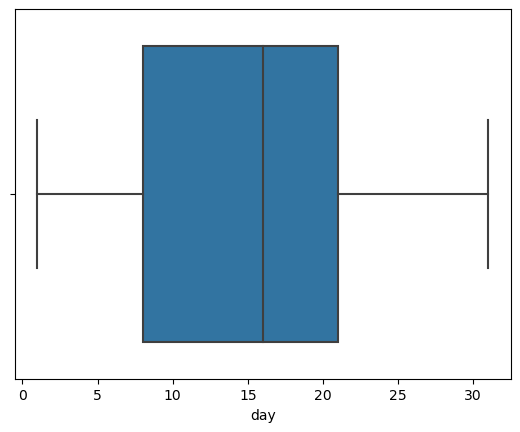

In [40]:
sns.boxplot(x='day',data=df)

<Axes: xlabel='duration'>

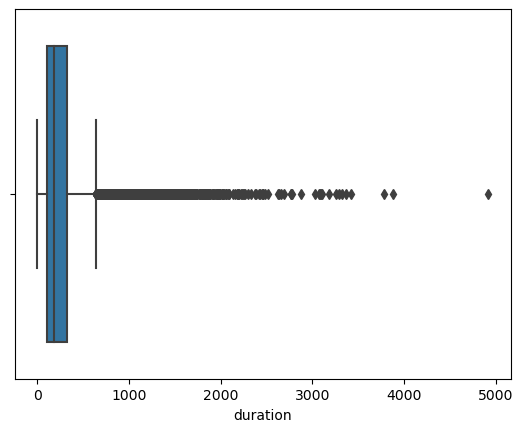

In [41]:
sns.boxplot(x='duration',data=df)

<Axes: xlabel='campaign'>

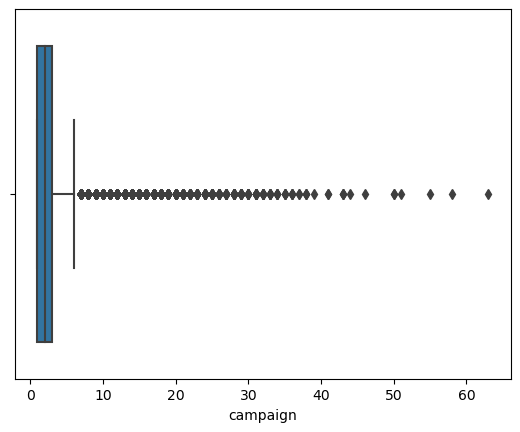

In [42]:
sns.boxplot(x='campaign',data=df)

<Axes: xlabel='pdays'>

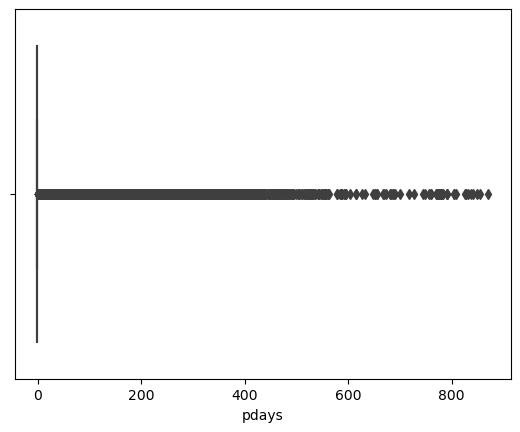

In [43]:
sns.boxplot(x='pdays',data=df)

<Axes: xlabel='previous'>

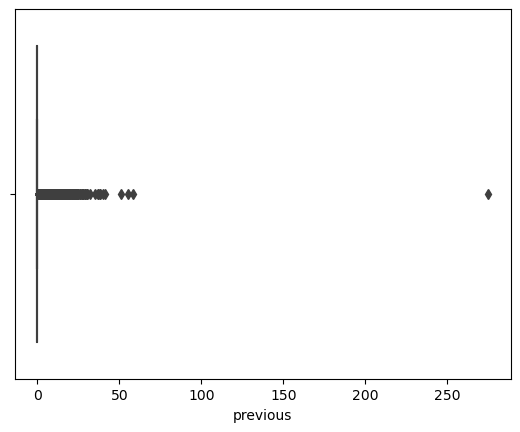

In [44]:
sns.boxplot(x='previous',data=df)

# `Insights`
There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
y=df.y

In [11]:
x=df.drop('y',axis=1)

In [12]:
x=x.apply(le.fit_transform)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
classifier=LogisticRegression()

In [27]:
classifier.fit(x,y)

LogisticRegression()

In [16]:
ypred=classifier.predict(x)

In [17]:
df1=pd.DataFrame({'actual':y,'predicted':ypred})

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y,ypred)

array([[38988,   934],
       [ 4250,  1039]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y,ypred))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     39922
         yes       0.53      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.71      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211

